<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Heart_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msn
import plotly.express as px

In [14]:
# load the dataset
heart_analysis = pd.read_csv('/content/heart_analysis_cleaned.csv')

In [ ]:
# data exploration
heart_analysis.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
heart_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386196 entries, 0 to 386195
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      386196 non-null  object 
 1   Sex                        386196 non-null  object 
 2   GeneralHealth              386196 non-null  object 
 3   PhysicalHealthDays         386196 non-null  float64
 4   MentalHealthDays           386196 non-null  float64
 5   LastCheckupTime            378935 non-null  object 
 6   PhysicalActivities         386196 non-null  object 
 7   SleepHours                 386196 non-null  float64
 8   RemovedTeeth               386196 non-null  object 
 9   HadHeartAttack             386196 non-null  object 
 10  HadAngina                  386196 non-null  object 
 11  HadStroke                  386196 non-null  object 
 12  HadAsthma                  386196 non-null  object 
 13  HadSkinCancer              38

## **Data Cleaning**

In [ ]:
# cheking missing values
heart_analysis.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,374
PhysicalHealthDays,3618
MentalHealthDays,2915
LastCheckupTime,2682
PhysicalActivities,384
SleepHours,1726
RemovedTeeth,4508
HadHeartAttack,1064


In [ ]:
# percentage of missing values
heart_analysis.isnull().mean()*100

,0
State,0.000000
Sex,0.000000
GeneralHealth,0.265595
PhysicalHealthDays,2.569310
MentalHealthDays,2.070077
LastCheckupTime,1.904613
PhysicalActivities,0.272696
SleepHours,1.225713
RemovedTeeth,3.201341
HadHeartAttack,0.755596


In [ ]:
heart_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140816 entries, 0 to 140815
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      140816 non-null  object 
 1   Sex                        140816 non-null  object 
 2   GeneralHealth              140816 non-null  object 
 3   PhysicalHealthDays         137198 non-null  float64
 4   MentalHealthDays           137901 non-null  float64
 5   LastCheckupTime            140816 non-null  object 
 6   PhysicalActivities         140816 non-null  object 
 7   SleepHours                 139090 non-null  float64
 8   RemovedTeeth               140816 non-null  object 
 9   HadHeartAttack             140816 non-null  object 
 10  HadAngina                  140816 non-null  object 
 11  HadStroke                  140816 non-null  object 
 12  HadAsthma                  140816 non-null  object 
 13  HadSkinCancer              14

## Handling categorical missing data using mode

In [ ]:
# List of categorical columns that need missing values replaced with mode
categorical_columns = ['LastCheckupTime', 'GeneralHealth', 'PhysicalActivities',
                       'SmokerStatus', 'RaceEthnicityCategory', 'AgeCategory',
                       'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke',
                       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
                       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
                       'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking',
                       'DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage',
                       'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
                       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']

# Loop over each categorical column and replace missing values with the mode
for col in categorical_columns:
    mode_value = heart_analysis[col].mode()[0]  # Get the most frequent value (mode)
    heart_analysis[col] = heart_analysis[col].fillna(mode_value)  # Replace missing values with mode

# Check for any remaining missing values in categorical columns
missing_values = heart_analysis[categorical_columns].isnull().sum()
print("Missing values in categorical columns after replacement:")
print(missing_values)


Missing values in categorical columns after replacement:
LastCheckupTime              0
GeneralHealth                0
PhysicalActivities           0
SmokerStatus                 0
RaceEthnicityCategory        0
AgeCategory                  0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
ECigaretteUsage              0
ChestScan                    0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10Tdap            0
HighRiskLastY

# Distibution of non_categorical values

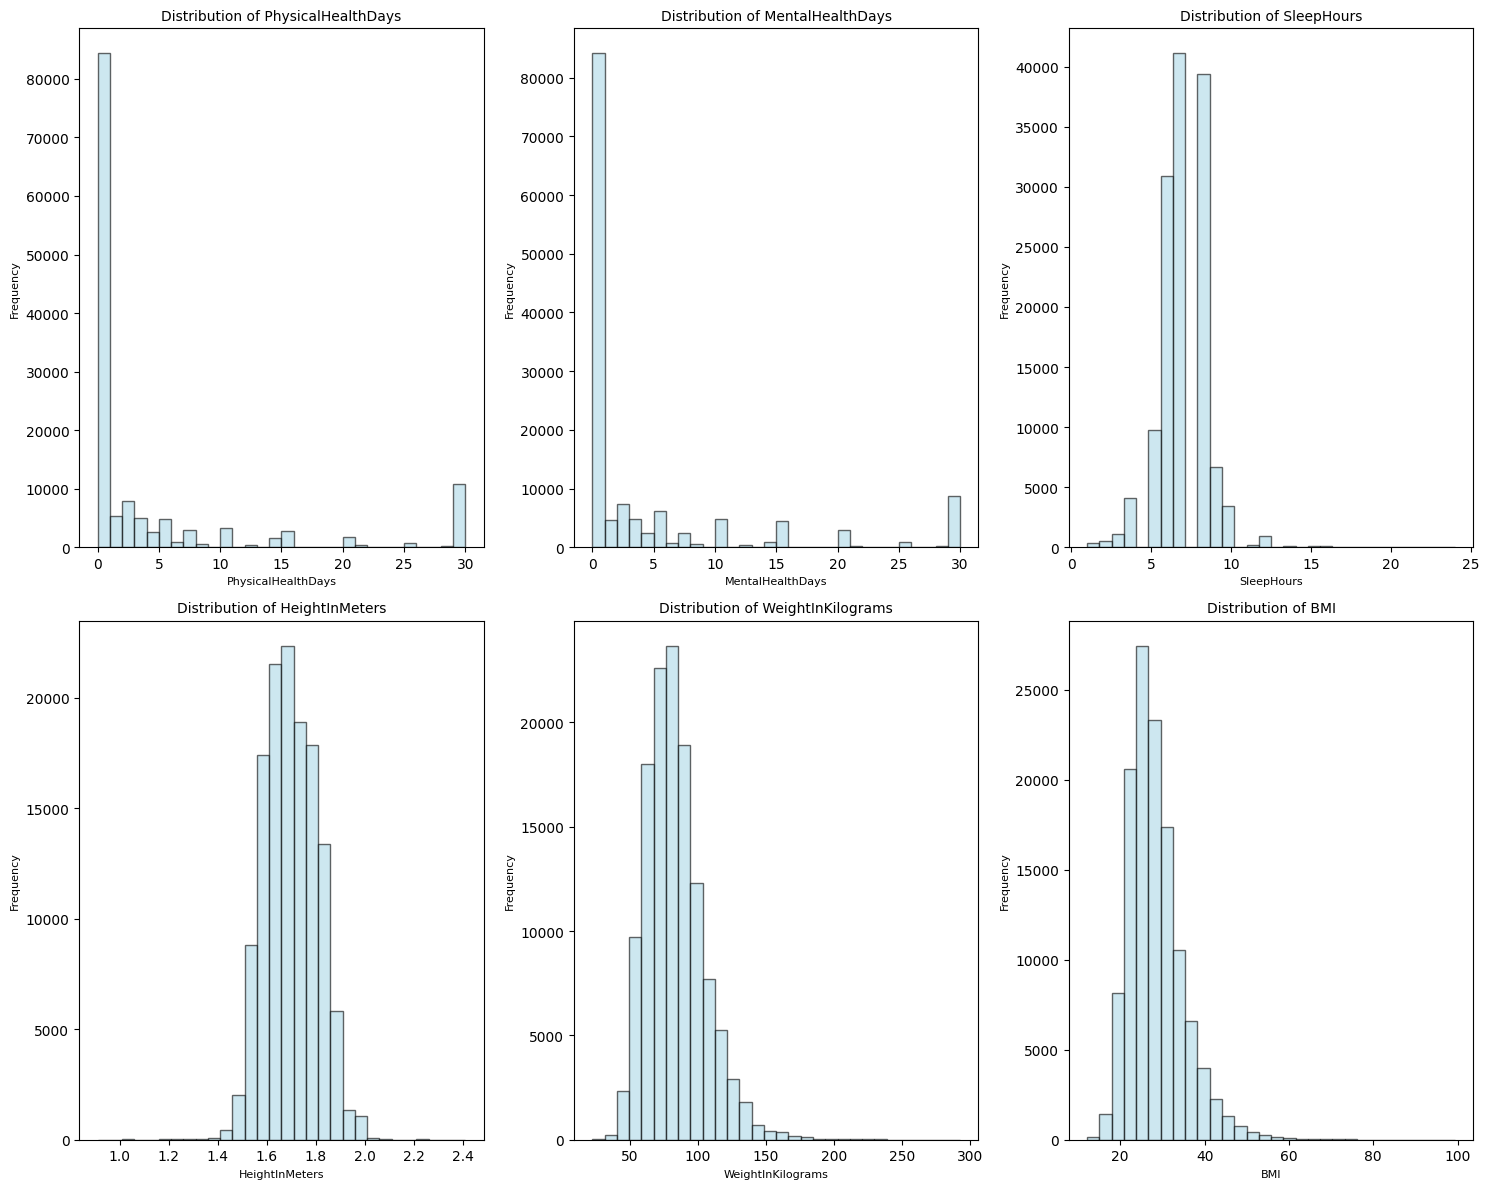

In [ ]:
# List of numeric columns (excluding categorical columns like 'HadHeartAttack', 'HadAngina', etc.)
numeric_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
                   'HeightInMeters', 'WeightInKilograms', 'BMI']

# Convert numeric columns to numeric, coercing errors to NaN
for col in numeric_columns:
    heart_analysis[col] = pd.to_numeric(heart_analysis[col], errors='coerce')

# Set up the figure for plotting
plt.figure(figsize=(15, 12))

# Plot histograms for all numeric columns
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid for plotting (adjust if necessary)
    plt.hist(heart_analysis[col].dropna(), bins=30, edgecolor='black', color='lightblue', alpha=0.6)  # Increase number of bins and reduce alpha for shorter bars
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


## Handling numerical missing values using either mean or median

In [ ]:
import pandas as pd

# Assuming heart_analysis is already loaded with your data

# List of columns and their respective treatment based on distribution
skewed_columns = ['PhysicalHealthDays', 'MentalHealthDays']
normal_columns = ['SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

# Replace missing values based on distribution
for col in skewed_columns:
    median_value = heart_analysis[col].median()  # Get the median for skewed data
    heart_analysis[col] = heart_analysis[col].fillna(median_value)  # Replace missing with median

for col in normal_columns:
    mean_value = heart_analysis[col].mean()  # Get the mean for normally distributed data
    heart_analysis[col] = heart_analysis[col].fillna(mean_value)  # Replace missing with mean

# Check if there are still missing values
missing_values = heart_analysis.isnull().sum()
print(missing_values)

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [16]:
# Step 1: Check for unique values and identify any unexpected ones
unique_smoker_status = heart_analysis['SmokerStatus'].unique()
print("Unique values in SmokerStatus:\n", unique_smoker_status)

# Step 2: Normalize and reduce values to two categories
heart_analysis['SmokerStatus'] = heart_analysis['SmokerStatus'].apply(
    lambda x: 'Current Smoker' if x in ['Current smoker - now smokes some days', 'Current smoker - now smokes every day'] else
    ('Non-Smoker' if x in ['Never smoked', 'Former smoker'] else 'Unknown')
)

# Step 3: Check the distribution of the reduced categories
cleaned_smoker_status = heart_analysis['SmokerStatus'].value_counts()
print("\nCleaned and Reduced Smoking Status Distribution:\n", cleaned_smoker_status)

Unique values in SmokerStatus:
 ['Never smoked' 'Current smoker - now smokes some days' 'Former smoker'
 'Current smoker - now smokes every day']

Cleaned and Reduced Smoking Status Distribution:
 SmokerStatus
Non-Smoker        124873
Current Smoker     15943
Name: count, dtype: int64


In [35]:
unique_diabetes_status = heart_analysis['HadDiabetes'].unique()
print("Unique values in HadDiabetes:\n", unique_diabetes_status)

Unique values in HadDiabetes:
 ['Yes' 'No' 'No, pre-diabetes or borderline diabetes'
 'Yes, but only during pregnancy (female)']


In [36]:
# Step 2: Normalize and reduce values to two categories
heart_analysis['HadDiabetes'] = heart_analysis['HadDiabetes'].apply(
    lambda x: 'Diabetic' if x == 'Yes' else
    ('Non-Diabetic' if x in ['No', 'No, pre-diabetes or borderline diabetes', 'Yes, but only during pregnancy (female)'] else 'Unknown')
)

# Step 3: Check the distribution of the reduced categories
cleaned_diabetes_status = heart_analysis['HadDiabetes'].value_counts()
print("\nCleaned and Reduced Diabetes Status Distribution:\n", cleaned_diabetes_status)


Cleaned and Reduced Diabetes Status Distribution:
 HadDiabetes
Non-Diabetic    121041
Diabetic         19775
Name: count, dtype: int64


In [56]:
# Define the mapping for age group classification, excluding "Teenager" category
age_group_mapping = {
    'Age 80 or older': 'Old',
    'Age 75 to 79': 'Old',
    'Age 70 to 74': 'Old',
    'Age 65 to 69': 'Old',
    'Age 60 to 64': 'Middle Age',
    'Age 55 to 59': 'Middle Age',
    'Age 50 to 54': 'Middle Age',
    'Age 45 to 49': 'Middle Age',
    'Age 40 to 44': 'Middle Age',
    'Age 35 to 39': 'Youth',
    'Age 30 to 34': 'Youth',
    'Age 25 to 29': 'Youth',
    'Age 18 to 24': 'Youth'  # Group "Teenager" into "Youth"
}

# Apply the mapping to create a new column 'AgeGroup'
AgeCategory = heart_analysis['AgeGroup'] = heart_analysis['AgeCategory'].replace(age_group_mapping)

# Check the updated 'AgeGroup' column
AgeCategory = heart_analysis['AgeGroup'].value_counts()
print(AgeCategory)

AgeGroup
Middle Age    53785
Old           53735
Youth         33296
Name: count, dtype: int64


In [ ]:
# Convert 'Yes' to 1 and 'No' to 0 in the selected condition columns
heart_analysis['HadHeartAttack'] = heart_analysis['HadHeartAttack'].map({'Yes': 1, 'No': 0})
heart_analysis['HadAngina'] = heart_analysis['HadAngina'].map({'Yes': 1, 'No': 0})
heart_analysis['HadStroke'] = heart_analysis['HadStroke'].map({'Yes': 1, 'No': 0})
heart_analysis['HadAsthma'] = heart_analysis['HadAsthma'].map({'Yes': 1, 'No': 0})
heart_analysis['HadSkinCancer'] = heart_analysis['HadSkinCancer'].map({'Yes': 1, 'No': 0})
heart_analysis['HadCOPD'] = heart_analysis['HadCOPD'].map({'Yes': 1, 'No': 0})
heart_analysis['HadDepressiveDisorder'] = heart_analysis['HadDepressiveDisorder'].map({'Yes': 1, 'No': 0})
heart_analysis['HadKidneyDisease'] = heart_analysis['HadKidneyDisease'].map({'Yes': 1, 'No': 0})
heart_analysis['HadArthritis'] = heart_analysis['HadArthritis'].map({'Yes': 1, 'No': 0})
heart_analysis['HadDiabetes'] = heart_analysis['HadDiabetes'].map({'Yes': 1, 'No': 0})

In [106]:
# save a copy of the cleaned dataset
heart_analysis_2 = heart_analysis.to_csv('heart_analysis_cleaned.csv', index=False)

## **Exploratory Data Analysis (EDA)**

In [ ]:
# Descriptive Statistics
heart_analysis.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,140816.000000,140816.000000,140816.000000,140816.000000,140816.000000,140816.000000
mean,4.298475,4.292438,7.010813,1.702631,82.769622,28.430014
std,8.671444,8.345337,1.512419,0.104264,20.443533,6.180269
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.160000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.390000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,28.250000
75%,3.000000,4.000000,8.000000,1.780000,90.720000,30.910000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.340000


<ipython-input-72-9966e95a7ade>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-9966e95a7ade>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-9966e95a7ade>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-9966

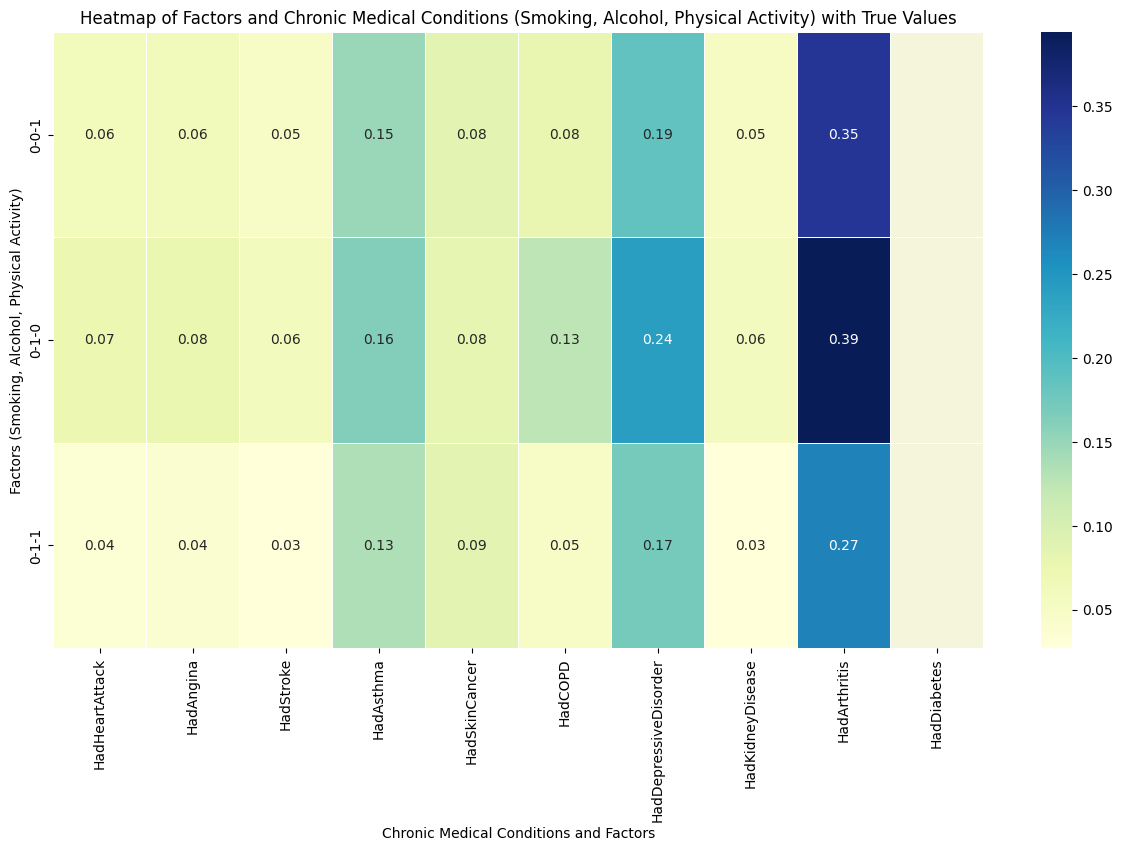

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select relevant columns for analysis
factors = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities'] + ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
                                                                   'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
                                                                   'HadKidneyDisease', 'HadArthritis', 'HadDiabetes']

# Filter dataset to include only relevant columns
heatmap_data = heart_analysis[factors]

# Replace 'SmokerStatus' with 'Non-Smoker' and 'Current Smoker'
heatmap_data['SmokerStatus'] = heatmap_data['SmokerStatus'].apply(
    lambda x: 'Current Smoker' if x in ['Current smoker - now smokes some days', 'Current smoker - now smokes every day'] else 'Non-Smoker'
)

# Convert 'Yes'/'No' values to numeric for each condition and factor (1 for Yes, 0 for No)
for column in factors:
    heatmap_data[column] = heatmap_data[column].map({'Yes': 1, 'No': 0, 'Physical activity': 1, 'No physical activity': 0, 'Current Smoker': 1, 'Non-Smoker': 0})

# Filter the data to include only rows where the value is 1 (i.e., conditions or behaviors are present)
# This step filters rows where the factors are true (1)
heatmap_data_filtered = heatmap_data[(heatmap_data[['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']] == 1).any(axis=1)]

# Group the filtered data by smoking status, alcohol drinkers, and physical activity to get proportions for each factor and condition
heatmap_data_grouped = heatmap_data_filtered.groupby(['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']).mean()

# Set up the figure and plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data_grouped, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)

# Title and labels
plt.title("Heatmap of Factors and Chronic Medical Conditions (Smoking, Alcohol, Physical Activity) with True Values")
plt.xlabel("Chronic Medical Conditions and Factors")
plt.ylabel("Factors (Smoking, Alcohol, Physical Activity)")
plt.show()

# **Data Analysis**

## Problem Statement: Impact of Lifestyle Factors on Health

This analysis will examine how various lifestyle factors (such as smoking, physical activity, alcohol consumption, etc.) affect health metrics like Physical Health Days, Mental Health Days, and BMI. We will also explore how Sleep Hours, Physical Activities, and General Health impact health outcomes.

Key Questions to Answer:

1. How do lifestyle factors like smoking, physical activity, and alcohol consumption impact Physical Health Days and Mental Health Days?
2. Is there a relationship between sleep hours and health outcomes (Physical Health Days, Mental Health Days)?
3. How does BMI correlate with lifestyle choices such as smoking, physical activity, and alcohol consumption?
4. Do people who engage in more physical activity report fewer health problems (e.g., fewer Physical Health Days lost)?
5. What is the relationship between health conditions (like Diabetes, Heart Attack) and lifestyle factors (e.g., smoking, alcohol consumption)?

## Distribution on medical conditions by State

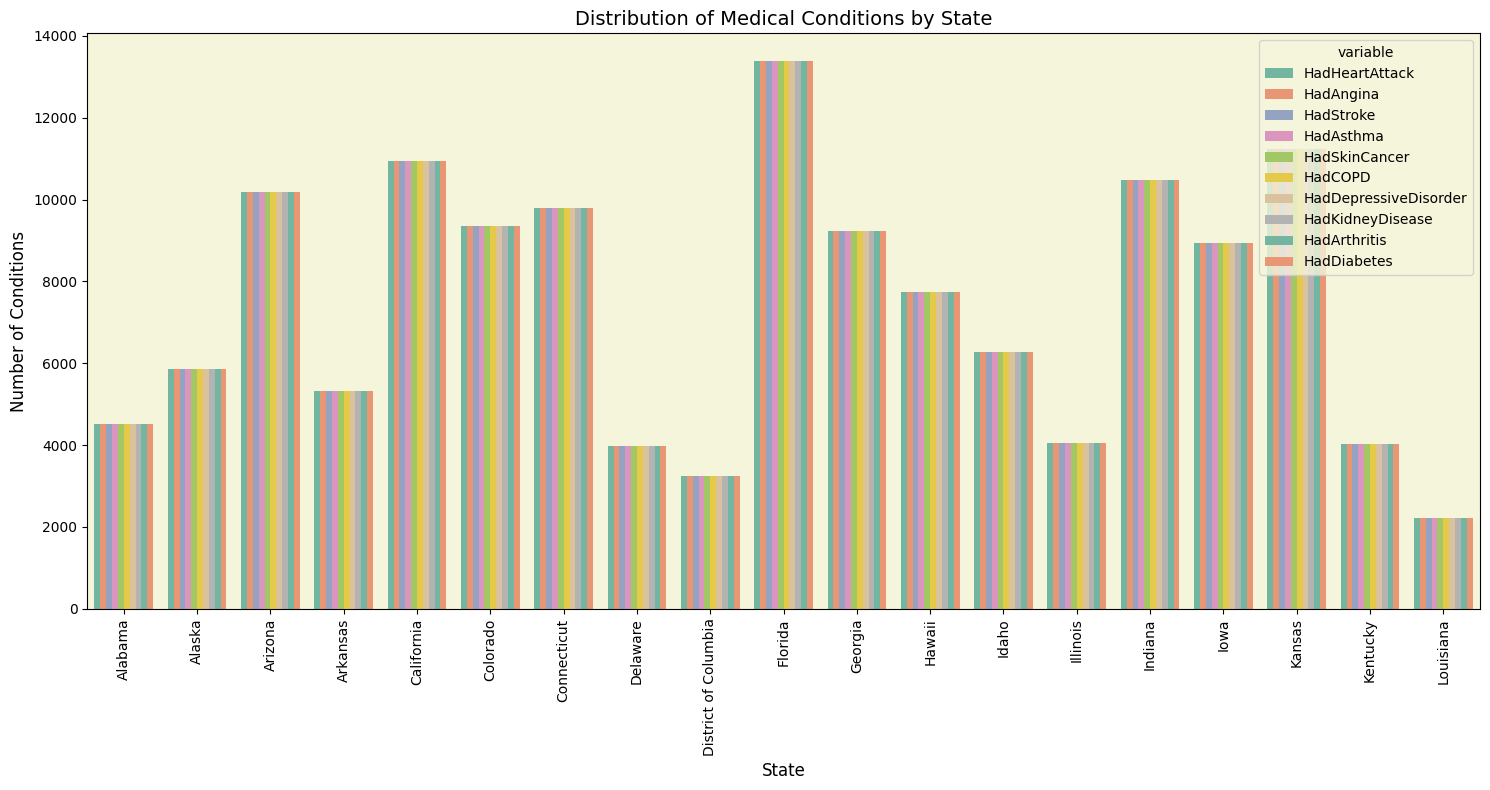

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter dataset to include only relevant columns
state_condition_data = heart_analysis[['State', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes']]

# Melt the data to make it easier to plot
state_condition_data_melted = state_condition_data.melt(id_vars=['State'], value_vars=['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes'])

# Calculate the total number of conditions per state
condition_counts_per_state = state_condition_data_melted.groupby('State')['value'].sum().reset_index()

# Sort the states by the total number of conditions in descending order
sorted_condition_counts = condition_counts_per_state.sort_values(by='value', ascending=False)

# Filter the data to show all states (sorted by the number of conditions)
sorted_state_condition_data = state_condition_data_melted[state_condition_data_melted['State'].isin(sorted_condition_counts['State'])]

# Create a countplot to show the number of occurrences of medical conditions for all states (sorted)
plt.figure(figsize=(15, 8))
sns.countplot(x='State', hue='variable', data=sorted_state_condition_data, palette='Set2')

# Add title and labels
plt.title('Distribution of Medical Conditions by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Conditions', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Summary of Insights on Chronic Medical Conditions in Florida**
- Aging Population: Florida has one of the highest percentages of residents aged 65 and older in the U.S., which significantly contributes to the state's higher rates of chronic medical conditions. Older adults are more susceptible to diseases like heart disease, diabetes, arthritis, and stroke. This age group typically experiences a higher incidence of chronic health issues.

- Lifestyle Factors: High prevalence of smoking, alcohol consumption, and poor diet are key lifestyle factors contributing to chronic medical conditions in Florida. These behaviors increase the risk of conditions like COPD, cancer, and cardiovascular disease. Lifestyle-related diseases are common in many populations and are likely influencing the health outcomes in the state.

- Climate and Environmental Factors: Florida's warm climate may exacerbate certain health conditions, especially respiratory diseases (COPD) and skin cancer due to prolonged sun exposure. The humid environment could also contribute to health problems like asthma and heart conditions, as high temperatures can stress the cardiovascular system.

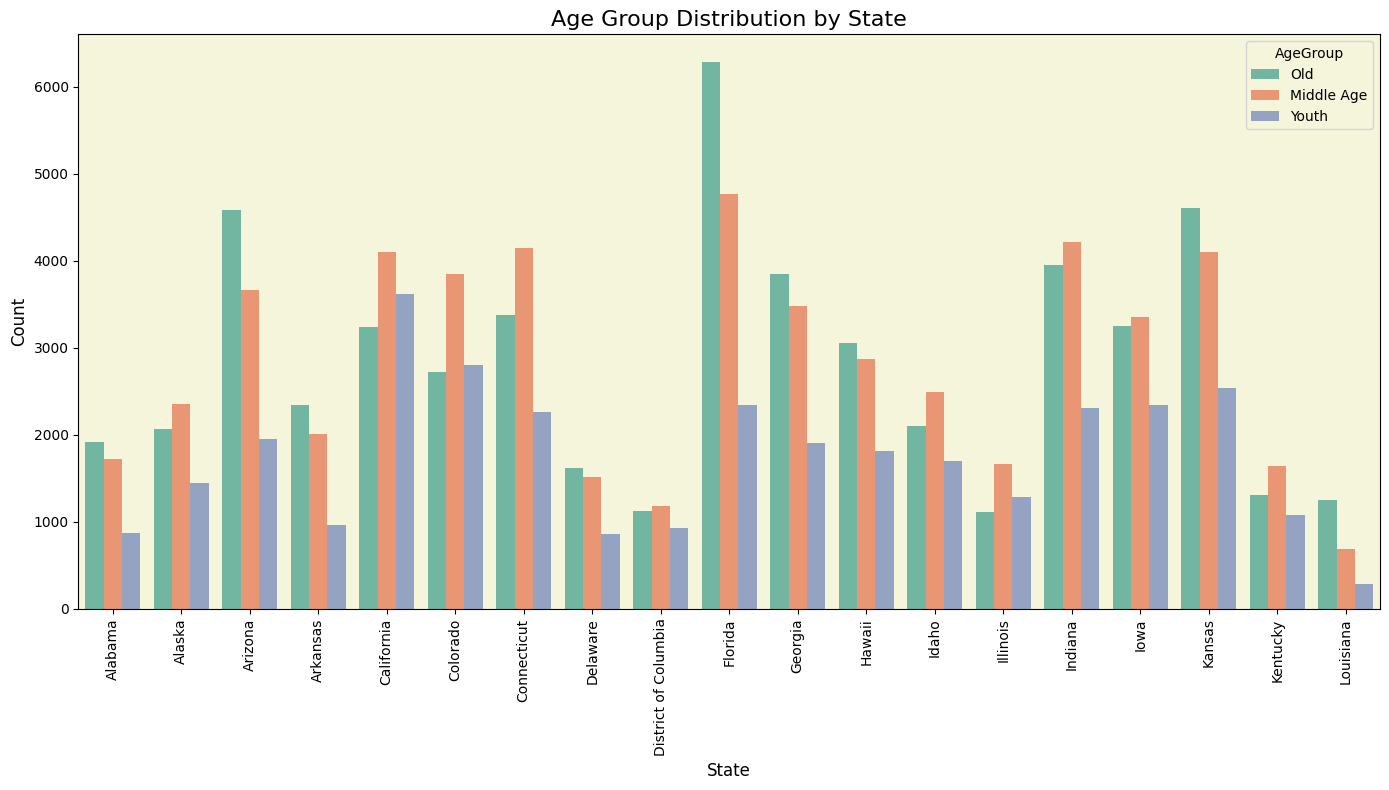

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `heart_analysis` with the columns 'States' and 'AgeGroup'
# Create a count plot to visualize the distribution of AgeGroup by state
plt.figure(figsize=(14, 8))
sns.countplot(data=heart_analysis, x='State', hue='AgeGroup', palette='Set2')

# Customize the plot
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.title('Age Group Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Florida’s Senior Population is Growing Rapidly
- Largest Percentage of Seniors: Florida is home to the highest percentage of seniors in the country. According to the U.S. Census Bureau, more than 20% of Florida’s population is 65 years or older, a higher percentage than any other state. In some counties, the percentage is even higher, with over 30% of residents being seniors.

## Florida is a Retirement Destination
- Popular Among Retirees: Florida has long been a popular destination for retirees. The state’s warm climate, no state income tax, and relatively affordable cost of living make it an attractive place for older adults to live. It’s often referred to as a “retirement haven” or the “Sunshine State” for its appeal to those looking to enjoy their later years.

#Alcohol and Smoking Usage By States

<ipython-input-64-8c828f7da2ce>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-64-8c828f7da2ce>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




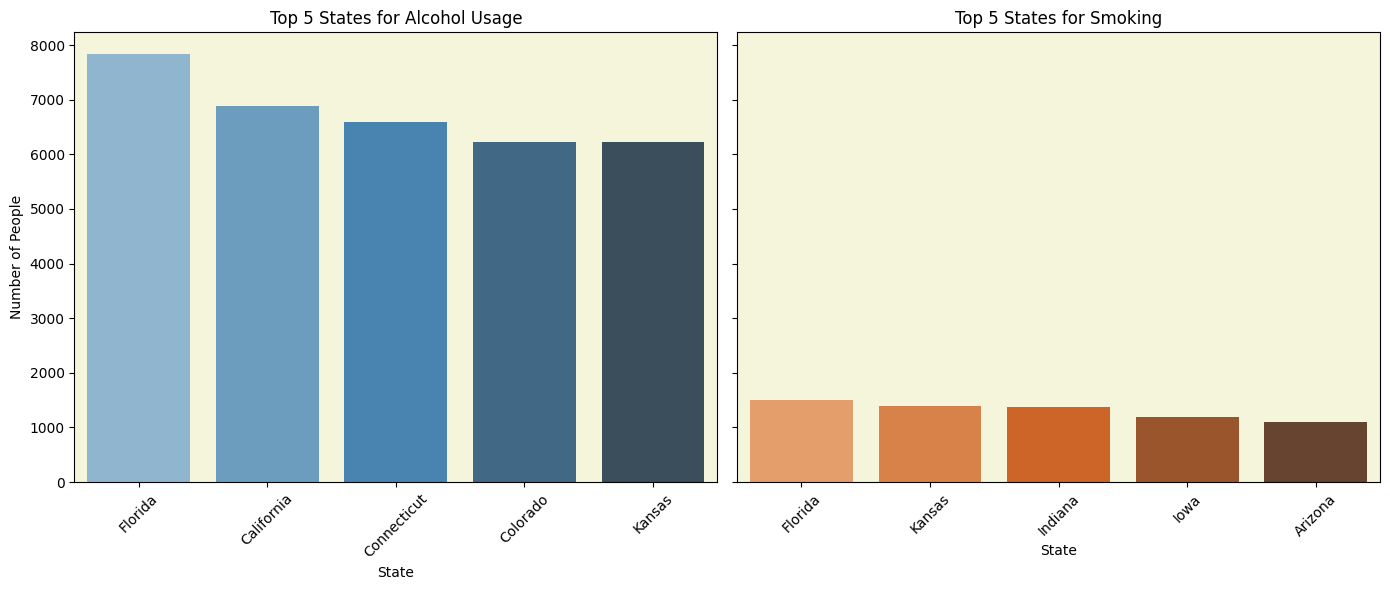

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for individuals who consume alcohol and those who are current smokers
alcohol_users = heart_analysis[heart_analysis['AlcoholDrinkers'] == 'Yes']
smokers = heart_analysis[heart_analysis['SmokerStatus'] == 'Current Smoker']

# Count alcohol users and smokers in each state and get the top 5
state_alcohol_counts = alcohol_users['State'].value_counts().nlargest(5)
state_smoker_counts = smokers['State'].value_counts().nlargest(5)

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Alcohol Usage
sns.barplot(x=state_alcohol_counts.index, y=state_alcohol_counts.values, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top 5 States for Alcohol Usage')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Number of People')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Smoking
sns.barplot(x=state_smoker_counts.index, y=state_smoker_counts.values, ax=axes[1], palette="Oranges_d")
axes[1].set_title('Top 5 States for Smoking')
axes[1].set_xlabel('State')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## **Florida's Drinking Culture**
- Popular Alcohol Consumption: Florida is known for its vibrant nightlife, especially in cities like **Miami**, **Tampa**, and **Orlando**, which attract both tourists and residents. The state's tourism industry fuels the consumption of alcoholic beverages, with visitors flocking to beaches, bars, and restaurants where alcohol is a central part of the experience.
- Beverage Preferences: Florida's warm climate makes cocktails like **Mojitos**, **Pina Coladas**, and **Margaritas** particularly popular, with many served in beachside bars or resorts. Florida is also a major producer of citrus, so citrus-based drinks like screwdrivers (vodka and orange juice) are a favorite.

## **E-Cigarette Use and Smoking Alternatives**

- Rise of Vaping: In recent years, vaping has become more popular in Florida, especially among young people. Although there are concerns about the long-term effects of e-cigarettes, they have become an alternative to traditional smoking. This trend has raised new challenges for tobacco control programs in the state

## **Alcohol and Smoking Correlation**

- Co-occurrence: Studies have shown that smoking and drinking often occur together, especially in social settings. Florida’s vibrant nightlife culture and tourism industry contribute to this overlap, where people tend to engage in both activities, leading to an increased risk of chronic diseases like liver cirrhosis, heart disease, and lung cancer.




## Prevalence of Chronic Diseases in Florida

<ipython-input-94-7ef81f48aefa>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




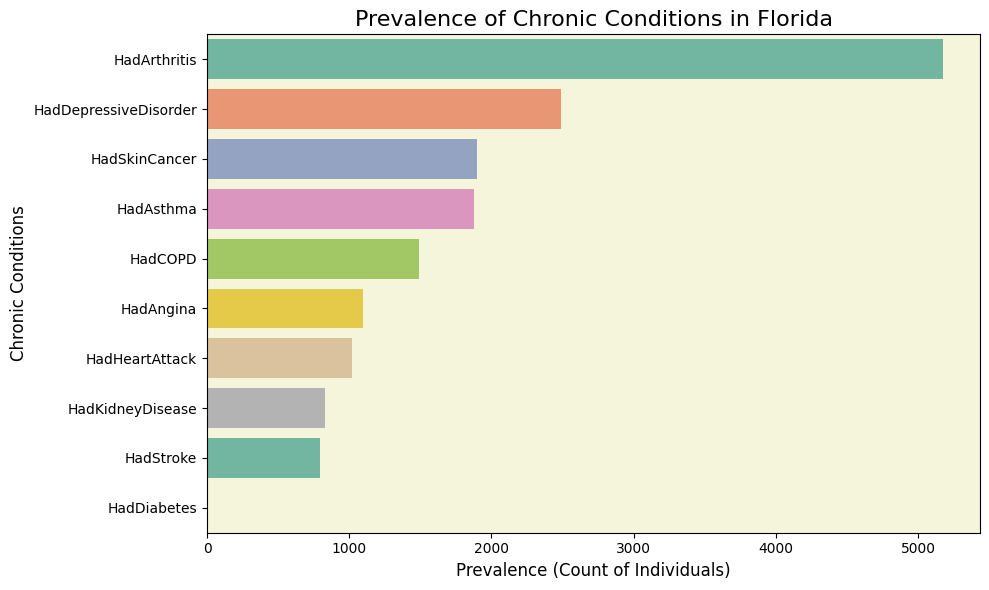

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the heart_analysis dataframe for Florida (assuming a 'State' column exists)
florida_data = heart_analysis[heart_analysis['State'] == 'Florida']

# List of chronic conditions present in your heart_analysis dataframe
conditions = ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
              'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
              'HadKidneyDisease', 'HadArthritis', 'HadDiabetes']

# Create a dictionary to store the prevalence of each condition for Florida
condition_prevalence_florida = {}

# Loop through each condition to calculate the prevalence for Florida
for condition in conditions:
    condition_prevalence_florida[condition] = florida_data[condition].sum()  # Summing up the 1's gives the count of individuals with the condition

# Convert the dictionary into a DataFrame for easier analysis
prevalence_df_florida = pd.DataFrame(list(condition_prevalence_florida.items()), columns=['Condition', 'Prevalence'])

# Sort the DataFrame by the 'Prevalence' column in descending order to find the most common condition
prevalence_df_florida = prevalence_df_florida.sort_values(by='Prevalence', ascending=False)

# Visualize the data using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Prevalence', y='Condition', data=prevalence_df_florida, palette='Set2')

# Add titles and labels
plt.title('Prevalence of Chronic Conditions in Florida', fontsize=16)
plt.xlabel('Prevalence (Count of Individuals)', fontsize=12)
plt.ylabel('Chronic Conditions', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

##  Prevalence of Arthritis in Florida
- According to the Centers for Disease Control and Prevention (CDC), about 50 million Americans suffer from arthritis. Florida, with its large senior population, is particularly affected. The state has one of the highest rates of arthritis among adults.
- Arthritis prevalence in Florida is estimated to be around 30% of the adult population. This figure is slightly higher in older age groups, especially those aged 65 and older, reflecting the aging population of the state.